In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.probability import FreqDist
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('amazon_review_data.pd')

In [3]:
df = df.sample(frac=1)

In [4]:
# Convert rating from double to int
df['rating'] = df['rating'].astype(int)

In [5]:
df['rating']

421633     5
391175     5
501753     5
1064611    5
698949     5
          ..
844910     3
681339     4
384422     5
1051042    3
837162     5
Name: rating, Length: 1228064, dtype: int32

In [6]:
rating_1_df = df.loc[df['rating'] == 1]
rating_2_df = df.loc[df['rating'] == 2]
rating_3_df = df.loc[df['rating'] == 3]
rating_4_df = df.loc[df['rating'] == 4]
rating_5_df = df.loc[df['rating'] == 5]

In [7]:
rating_negative_df = rating_3_df
rating_negative_df = rating_negative_df.append(rating_2_df)
rating_negative_df = rating_negative_df.append(rating_1_df)

rating_positive_df = rating_5_df
rating_positive_df = rating_positive_df.append(rating_4_df)

rating_negative_df['rating'] = 0
rating_positive_df['rating'] = 1

### Run one of the following cells

In [8]:
# numValues = 55000
# df.drop(df.index, inplace=True)
# df = df.append(rating_1_df[:numValues])
# df = df.append(rating_2_df[:numValues])
# df = df.append(rating_3_df[:numValues])
# df = df.append(rating_4_df[:numValues])
# df = df.append(rating_5_df[:numValues])

In [9]:
numValues = min(len(rating_positive_df),len(rating_negative_df))
df.drop(df.index, inplace=True)
df = df.append(rating_positive_df[:numValues])
df = df.append(rating_negative_df[:numValues])

### Data splitting

In [10]:
train_X,test_X,train_y,test_y = train_test_split(df['reviews'], df['rating'], test_size=0.20, random_state=42)
train_len,test_len = len(train_X),len(test_X)
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english', max_features= 25000,strip_accents='unicode', norm='l2')
train_X = vectorizer.fit_transform(train_X[:50000]).todense()
test_X = vectorizer.transform(test_X).todense()

### Deep Learning Model

In [11]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv1D,MaxPooling1D,Flatten
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils

In [55]:
model = keras.Sequential()
model.add(Dense(1000,activation="relu", input_dim=25000))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [57]:
# model.fit(train_X[:15000],Y_train[:15000], batch_size=64, epochs=10,verbose=1)
model.fit(train_X[:20000],train_y[:20000], epochs=3)

Epoch 1/3
625/625 [==============================] - 51s 81ms/step - loss: 0.0677 - accuracy: 0.9147
Epoch 2/3
625/625 [==============================] - 50s 80ms/step - loss: 0.0265 - accuracy: 0.9685
Epoch 3/3
625/625 [==============================] - 50s 81ms/step - loss: 0.0124 - accuracy: 0.9862


In [71]:
# accuracy_score(test_y[:1000],model.predict(test_X[:1000]))
s_ubset = 1000
pred = model.predict(test_X[:s_ubset])
# pred_t = model.predict(train_X[:100])
test_y = test_y.reset_index(drop=True)
# train_y = train_y.reset_index(drop=True)

pred_0_1 = []
for y in pred:
    if y > .5:
        pred_0_1.append(1)
    else:
        pred_0_1.append(0)
accuracy_score(test_y[:s_ubset],pred_0_1)

# pred = [for y in pred]
# for i in range(99):
#     print(pred[i][0],test_y[i])
# for i in range(99):
#     print(pred_t[i][0],train_y[i])

0.808

### SVM classifier

In [52]:
# # clf = MultinomialNB().fit(train_X, train_y[:100000])
subset_data = 1000
from sklearn import svm
clf = svm.SVC()
clf.fit(train_X[:subset_data], train_y[:subset_data])

SVC()

Confusion matrix, without normalization
[[426  71]
 [199 304]]
Normalized confusion matrix
[[0.85714286 0.14285714]
 [0.39562624 0.60437376]]


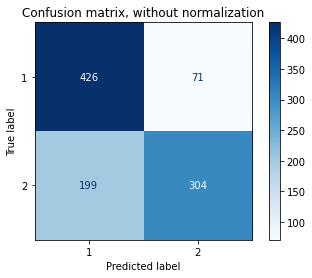

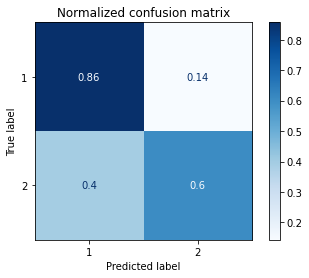

In [53]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_X[:1000], test_y[:1000],
                                 display_labels=np.arange(1,3),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

In [84]:
text = ["Washed before wanting to use. Piles of fuzz and lint. Gonna need serious shaking outside or something before it can be used. Organic"]
# # vectorizer = TfidfVectorizer()
# # train_X = vectorizer.fit_transform(train_X[:10000])
ya_yeet = vectorizer.transform(text).todense()
# clf.predict(ya_yeet)
model.predict(ya_yeet)

array([[0.7465317]], dtype=float32)